# Data preparation

Importing data. Useful cheatsheet : https://www.datacamp.com/community/blog/importing-data-python-cheat-sheet

### Working with text files : import txt, output txt, json file line by line, etc..

We shall use as an example the Sermon on the mount from the beginning of Matthew Ch. 5.

You can input the whole chuck of a text into memory.

In [10]:
txt_filename = "./data/sermon.txt"

text = []
with open(txt_filename, "r") as input_f:
    text = input_f.read()
        
text[:99]
#Print first 99 characters

'Jesus went about in all Galilee, teaching in their synagogues, preaching the Good News of the Kingd'

In order to analyse the text by paragraphs, we need to single them out. 

In [11]:
paragraphs = text.split("\n")#\n is the name for skipping to the next line
paragraphs[0]

'Jesus went about in all Galilee, teaching in their synagogues, preaching the Good News of the Kingdom, and healing every disease and every sickness among the people. The report about him went out into all Syria. They brought to him all who were sick, afflicted with various diseases and torments, possessed with demons, epileptics,  and  paralytics;  and  he  healed  them. Great  multitudes  from  Galilee,  Decapolis,  Jerusalem,  Judea and from beyond the Jordan followed him.'

Input of the text file can be done via importing the text line by line, where line is a chuck of text ending with the "enter" sign `\n`. 

In [12]:
txt_filename = "./data/sermon.txt"

text = []
with open(txt_filename, "r") as input_f:
    for line in input_f:
        text.append(line)
text[0]

'Jesus went about in all Galilee, teaching in their synagogues, preaching the Good News of the Kingdom, and healing every disease and every sickness among the people. The report about him went out into all Syria. They brought to him all who were sick, afflicted with various diseases and torments, possessed with demons, epileptics,  and  paralytics;  and  he  healed  them. Great  multitudes  from  Galilee,  Decapolis,  Jerusalem,  Judea and from beyond the Jordan followed him.\n'

However, extracting sentences is not straightforward.

In [13]:
txt_filename = "./data/sermon.txt"

text = []
with open(txt_filename, "r") as input_f:
    text = input_f.read()

sentences = text.split(". ")
print('\n-----\n'.join(sentences[:10]))

Jesus went about in all Galilee, teaching in their synagogues, preaching the Good News of the Kingdom, and healing every disease and every sickness among the people
-----
The report about him went out into all Syria
-----
They brought to him all who were sick, afflicted with various diseases and torments, possessed with demons, epileptics,  and  paralytics;  and  he  healed  them
-----
Great  multitudes  from  Galilee,  Decapolis,  Jerusalem,  Judea and from beyond the Jordan followed him.

Seeing the multitudes, he went up onto the mountain
-----
When he had sat down, his disciples came to him
-----
He opened his mouth and taught them, saying:  

Blessed are the poor in spirit,  for theirs is the Kingdom of Heaven.d 

Blessed are those who mourn,  for they shall be comforted
-----
 

Blessed are the gentle,  for they shall inherit the earth
-----


Blessed are those who hunger and thirst after righteousness, for they shall be filled
-----
 

Blessed are the merciful,  for they shall o

## Powerful tool to work with text: `nltk` module https://www.nltk.org.

Use it now to extract sentences from text.

Install command from terminal `conda install -c anaconda nltk`

In [2]:
import nltk 
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


False

In [15]:
txt_filename = "./data/sermon.txt"

text = []
with open(txt_filename, "r") as input_f:
    text = input_f.read()
        
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/igor/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.12/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.12/share/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.12/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [25]:
sentences = sent_detector.tokenize(text.strip())
print('\n-----\n'.join(sentences[:10]))

NameError: name 'sent_detector' is not defined

### Working with str data: regex, string functions

Regular expressions help to find meaningful patterns in text data. It is however rather complicated to grasp. See documentation https://docs.python.org/3/library/re.html

Below we use the regex to search for proper names in the sentence.

In [8]:
import re 

s = sentences[3]
re.findall("(?<!^)(?<!\. )[A-Z][a-z]+", s)

['Galilee', 'Decapolis', 'Jerusalem', 'Judea', 'Jordan']

In [9]:
print(s.split(" "))

['Great', '', 'multitudes', '', 'from', '', 'Galilee,', '', 'Decapolis,', '', 'Jerusalem,', '', 'Judea', 'and', 'from', 'beyond', 'the', 'Jordan', 'followed', 'him.']


***

# Networks

We glance over the `networkx` module : https://networkx.github.io/documentation/stable/. This module is the easiest and very powerful when working with not too large networks. Of course, there exist other modules for manipulation with networks: `igraph` https://igraph.org/python/, `graph-tool` https://graph-tool.skewed.de/, etc.

In [30]:
# Networks : networkx - what is a graph (internal representation), access nodes, edges, properties, algorithms
import networkx as nx

Define a network

In [31]:
G = nx.Graph()

Add nodes and edges:

In [32]:
G.add_node(1, size = 1)
G.add_nodes_from([2,3,4], size = [2,3,4])

G.add_edge(1,2, weight = 1)
G.add_edges_from([(2,3), (2,4), (1,4)], weight = [2,3,4])

Show the information about the graph:

In [ ]:
print(G)

Graph with 4 nodes and 4 edges


Access node and edge attributes:

In [35]:
print("node size:", G.nodes[1]["size"])
print("edge weight:", G[1][2]["weight"])

node size: 1
edge weight: 1


Iterate over the nodes and edges:

In [36]:
# nodes
for u in G.nodes():
    print(u, end = " ")
print("\n------")
# edges
for u,v in G.edges():
    print("{}-{}".format(u,v), end=" --> ")

1 2 3 4 
------
1-2 --> 1-4 --> 2-3 --> 2-4 --> 

Remove nodes and edges from a graph

In [38]:
edges_to_remove = [(1,2), (3,4)]
G.remove_edges_from(edges_to_remove)
print(G)
print("-------------------------")
nodes_to_remove = [1,2]
G.remove_nodes_from(nodes_to_remove)
print(G)

Graph with 4 nodes and 3 edges
-------------------------
Graph with 2 nodes and 0 edges


## Fancy networks

There are one liners for generating networks from various models.

In [40]:
ER = nx.erdos_renyi_graph(100, 0.05)
print(ER)

Graph with 100 nodes and 244 edges


Draw network

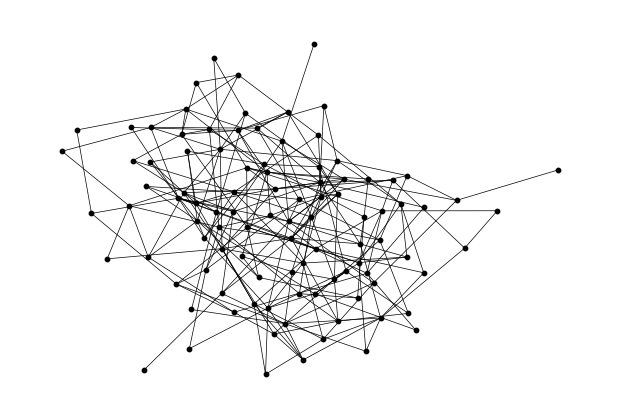

In [42]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

g_draw = ER

fig = plt.figure(figsize=(6,4))

pos = nx.spring_layout(g_draw)
nx.draw(g_draw, pos, node_color='black', node_size=10, width=0.5)
plt.show()

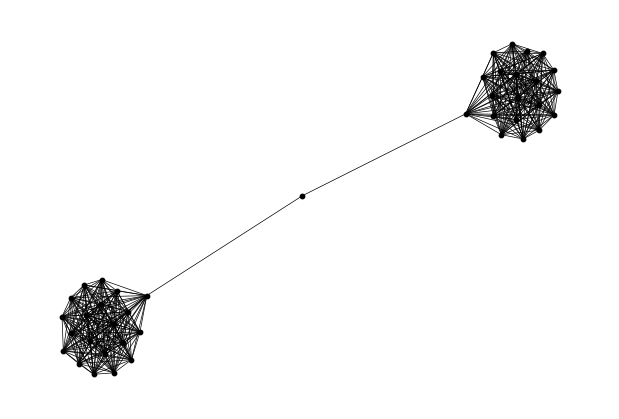

In [43]:
g_draw = nx.barbell_graph(20, 1)

fig = plt.figure(figsize=(6,4))
pos = nx.spring_layout(g_draw)
nx.draw(g_draw, pos, node_color='black', node_size=10, width=0.5)
plt.show()

Predefined algorithms for network analysis:

In [44]:
n = 10000
ER = nx.erdos_renyi_graph(n, 2/n)
# print("Sizes of connected components:", [len(x) for x in list(nx.connected_components(ER))])

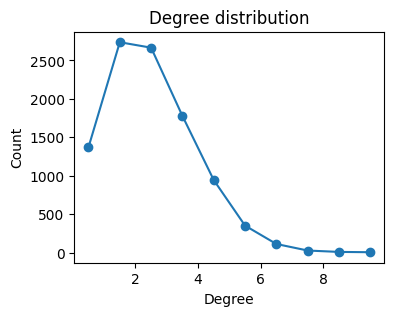

In [46]:
import numpy as np
degrees = [ER.degree(u) for u in ER.nodes()]#Get the degree of every node for all nodes in the graph

b_width = 1
bins = np.arange(min(degrees), max(degrees)+b_width, b_width)
hist, bins = np.histogram(degrees, bins = bins)
center_bins = [l+b_width/2 for l in bins[:-1]]

fig = plt.figure(figsize=(4,3))
plt.plot(center_bins, hist, marker = "o")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.title("Degree distribution")
plt.show()

More info in the documentation: https://networkx.github.io/documentation/stable/reference/index.html